# About the Date

**Data Overview:**

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

**FEATURES**

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

**DATASET**

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.


**Target Variable**:

Here the target variable is the price of the ticket price

# Undertand The Data

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
293481,293481,Vistara,UK-824,Chennai,Night,one,Early_Morning,Bangalore,Business,11.33,4.0,50449.0
293482,293482,Vistara,UK-824,Chennai,Night,one,Evening,Bangalore,Business,22.75,4.0,50449.0
293483,293483,Vistara,UK-824,Chennai,Night,one,Night,Bangalore,Business,26.33,4.0,50449.0
293484,293484,Air_India,AI-766,Chennai,Early_Morning,one,Afternoon,Bangalore,Business,31.33,4.0,50838.0


## Data Analysing

In [ ]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
df.info()
print(f'Dataset contain {df.shape[0]} rows and {df.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
Dataset contain 300153 rows and 12 columns


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


## finding Missing Values

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


# **Data Visualization**

In [ ]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


# Code for visualisation in a single code

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

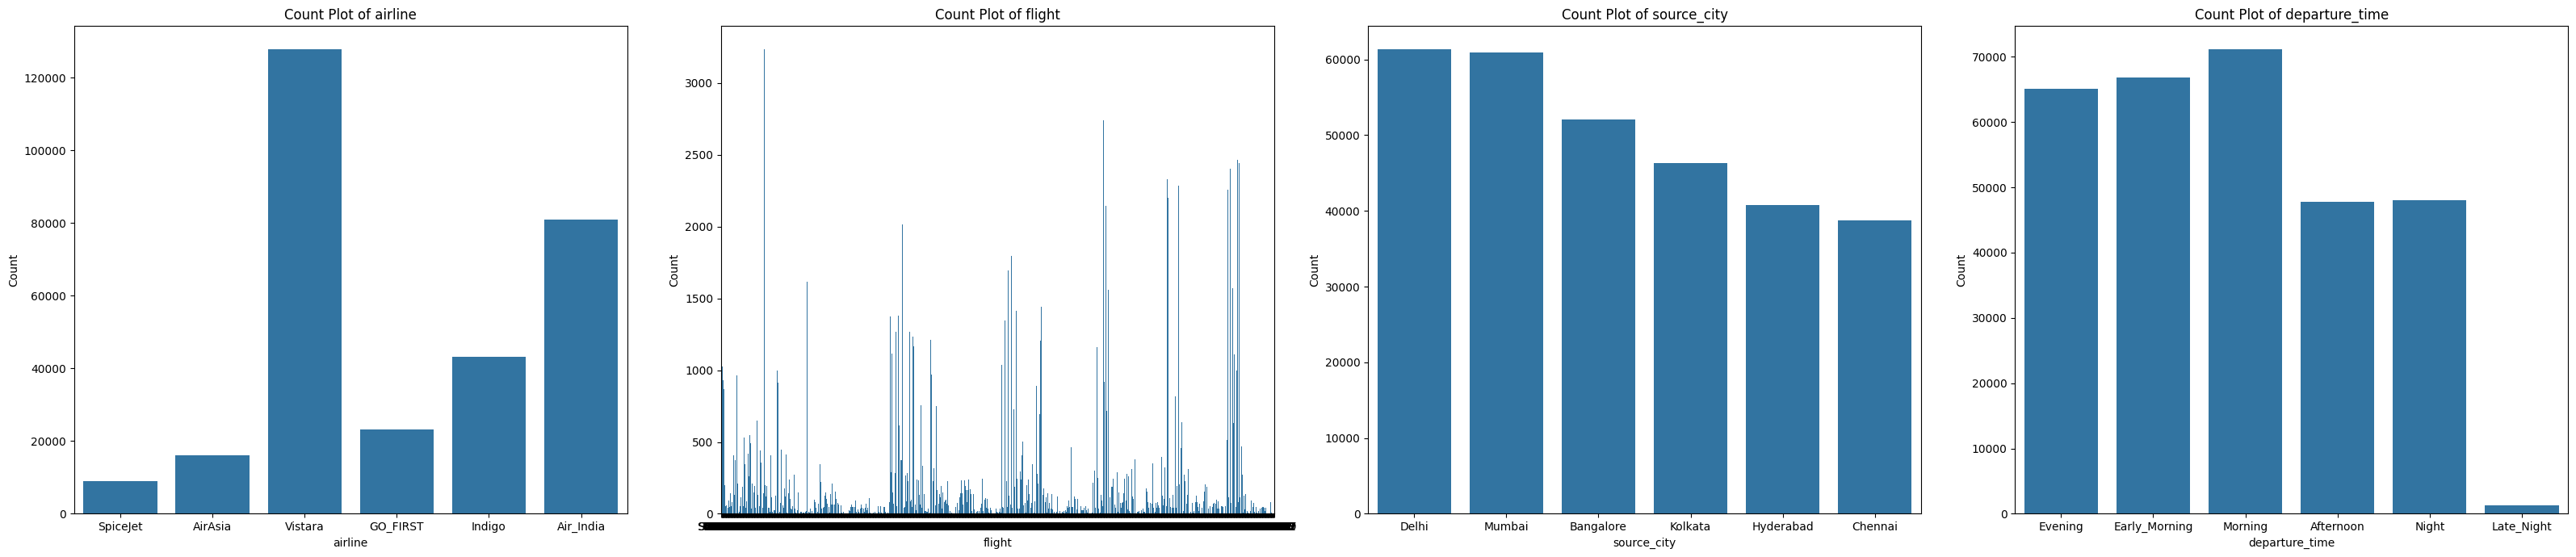

In [ ]:
columns_to_plot = ['airline', 'flight', 'source_city',"departure_time"]

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(32, 7))

# Loop through the columns and create a count plot for each
for ax, col in zip(axes, columns_to_plot):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

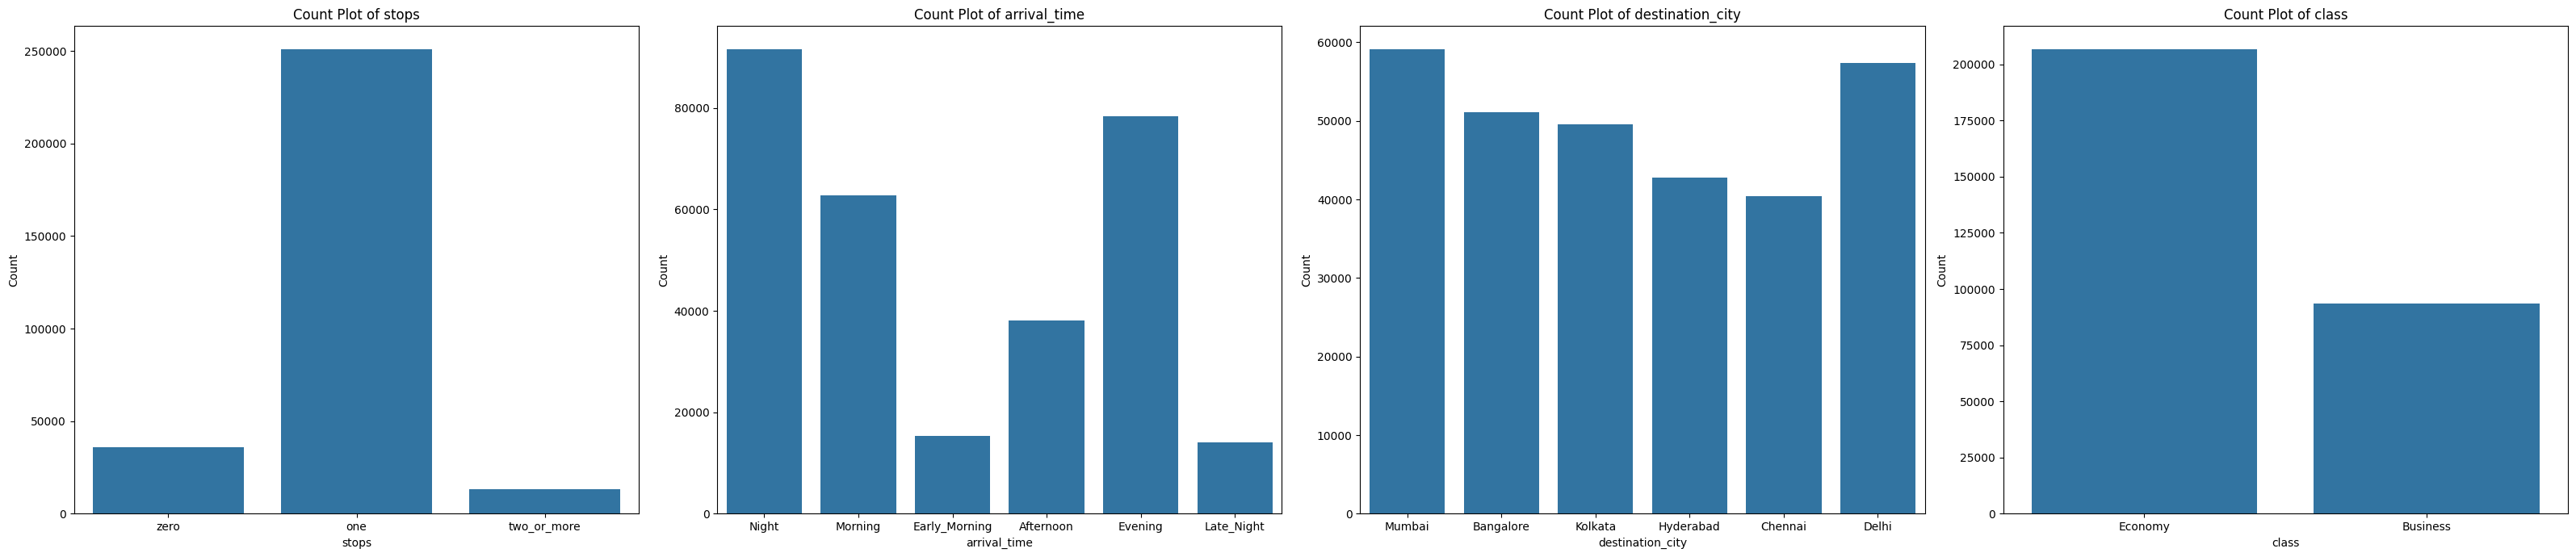

In [ ]:
columns_to_plot = ['stops','arrival_time', 'destination_city',"class"]

# Set up the figure with subplots
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(32, 7))

# Loop through the columns and create a count plot for each
for ax, col in zip(axes, columns_to_plot):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Outlier Detection

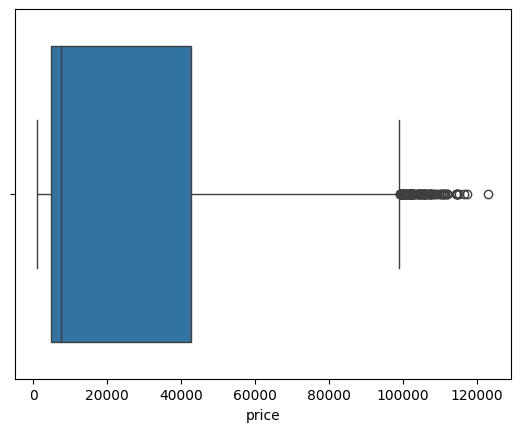

In [ ]:
sns.boxplot(x=df['price'])
plt.show()


In [ ]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
outliers=df[(df['price']<lower_bound)|(df['price']>upper_bound)]
outliers

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
215858,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,114434
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562
216025,Vistara,UK-817,Delhi,Evening,two_or_more,Morning,Kolkata,Business,17.58,4,100395
216094,Vistara,UK-995,Delhi,Morning,one,Evening,Kolkata,Business,6.50,5,99129
216095,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Business,8.00,5,101369
...,...,...,...,...,...,...,...,...,...,...,...
293474,Vistara,UK-836,Chennai,Morning,one,Night,Bangalore,Business,9.67,3,107597
296001,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,3,102832
296081,Vistara,UK-832,Chennai,Early_Morning,one,Night,Kolkata,Business,15.83,5,102384
296170,Vistara,UK-838,Chennai,Night,one,Morning,Kolkata,Business,11.50,7,104624


In [ ]:
outliers.duration.describe()

,duration
count,123.000000
mean,14.403171
std,5.388195
min,5.920000
25%,10.710000
50%,13.330000
75%,17.125000
max,28.170000


# Removing Outliers

In [ ]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300030 non-null  int64  
 1   flight            300030 non-null  int64  
 2   source_city       300030 non-null  int64  
 3   departure_time    300030 non-null  int64  
 4   stops             300030 non-null  int64  
 5   arrival_time      300030 non-null  int64  
 6   destination_city  300030 non-null  int64  
 7   class             300030 non-null  int64  
 8   duration          300030 non-null  float64
 9   days_left         300030 non-null  int64  
 10  price             300030 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 27.5 MB


# Data Processing

In [ ]:
df = df.drop(columns='flight')

# Encoding

In [ ]:
categorical_cols = df.iloc[:,:7]

categorical_cols.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:

    df[col] = label_encoder.fit_transform(df[col])

# **Correlation analysis**

In [ ]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['airline'] = labelencoder.fit_transform(df['airline'])
df['flight'] = labelencoder.fit_transform(df['flight'])
df['source_city'] = labelencoder.fit_transform(df['source_city'])
df['departure_time'] = labelencoder.fit_transform(df['departure_time'])
df['stops']=labelencoder.fit_transform(df['stops'])
df['arrival_time']=labelencoder.fit_transform(df['arrival_time'])
df['destination_city']=labelencoder.fit_transform(df['destination_city'])
df['class']=labelencoder.fit_transform(df['class'])

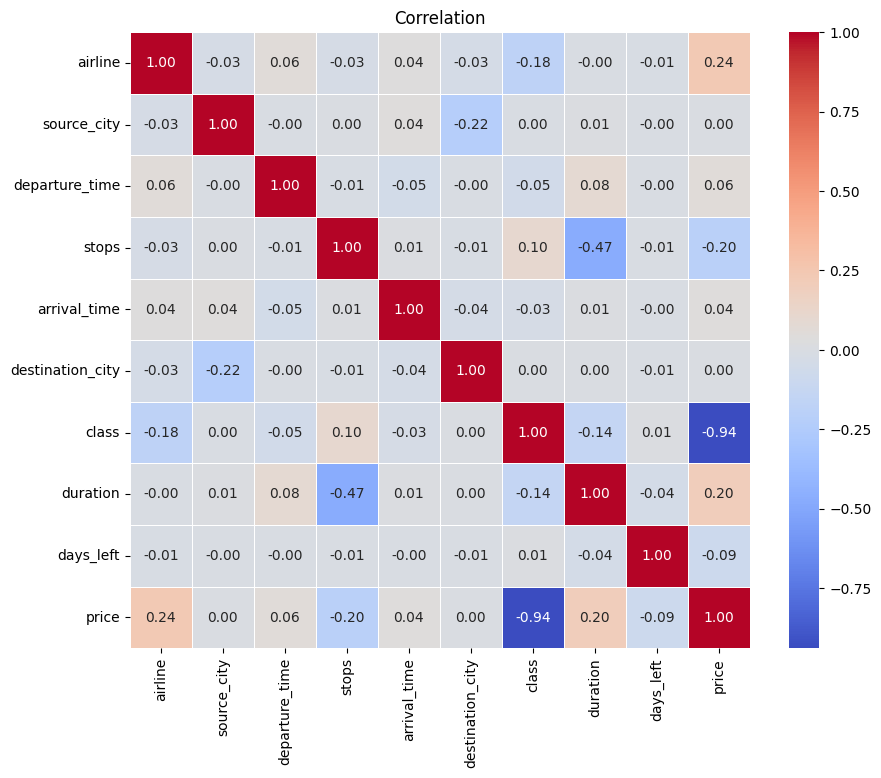

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation')

plt.show()

In [ ]:
#df.drop(columns=['airline','source_city','departure_time','arrival_time','destination_city','days_left'])

In [ ]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


# Outleir Detection

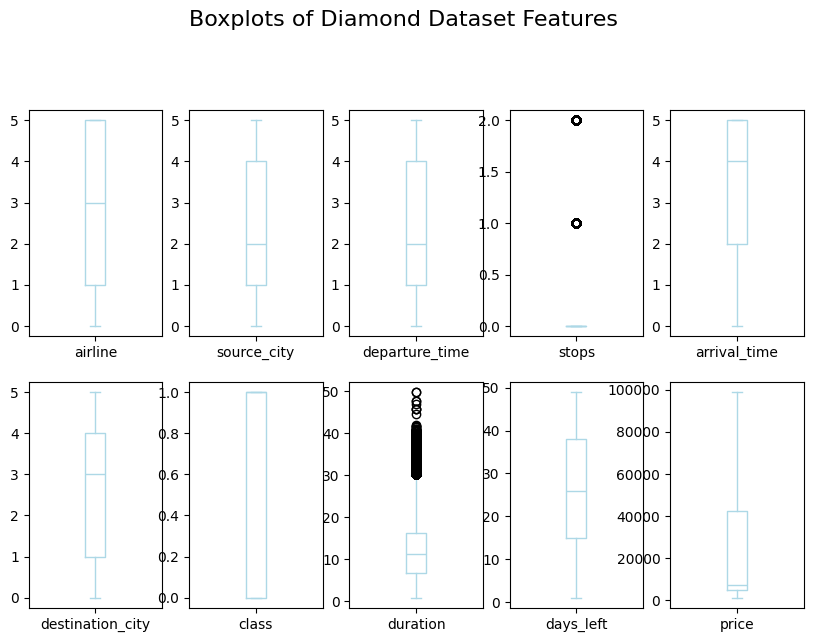

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Diamond Dataset Features', fontsize=16)
plt.show()

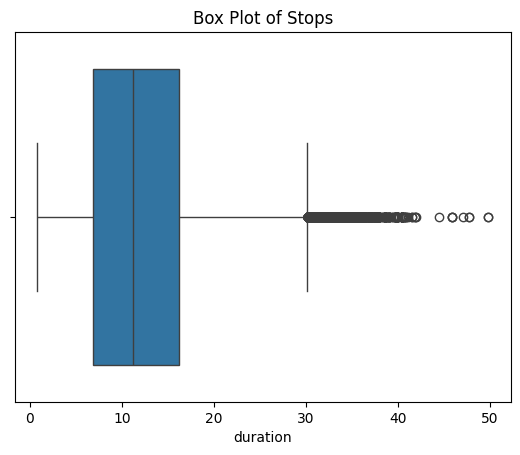

Number of outliers in duration: 722


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['duration'])
plt.title('Box Plot of Stops')
plt.show()

# Z-score to detect outliers
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['duration']))
outliers = df[z_scores > 3]
print(f'Number of outliers in duration: {outliers.shape[0]}')

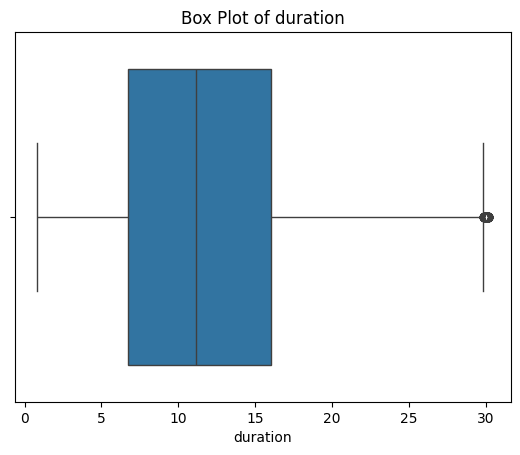

In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.show()

# PCA Method

<ipython-input-32-b0513b1cd258>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca1'] = pca_result[:, 0]
<ipython-input-32-b0513b1cd258>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pca2'] = pca_result[:, 1]


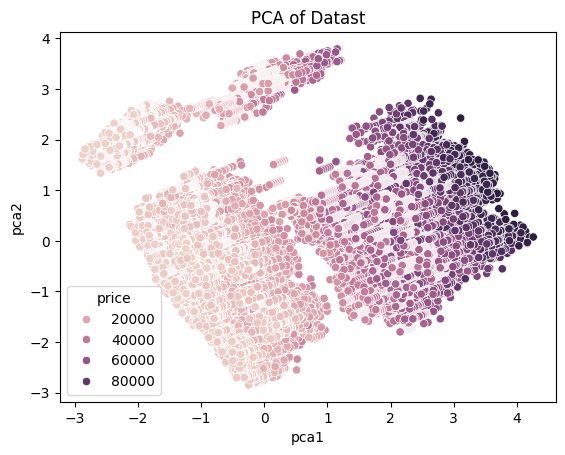

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='price', data=df)
plt.title('PCA of Datast')
plt.show()

# **Data Scaling**

In [ ]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,pca1,pca2
0,4,2,2,2,5,5,1,2.17,1,5953,-1.766289,2.363627
1,4,2,1,2,4,5,1,2.33,1,5953,-1.834845,2.334372
2,0,2,1,2,1,5,1,2.17,1,5956,-2.410099,1.641691
3,5,2,4,2,0,5,1,2.25,1,5955,-1.643781,2.147672
4,5,2,4,2,4,5,1,2.33,1,5955,-1.549882,2.355265
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265,2.440679,0.917111
300149,5,1,0,0,5,3,0,10.42,49,77105,2.527681,1.282781
300150,5,1,1,0,5,3,0,13.83,49,79099,2.791301,0.963779
300151,5,1,1,0,2,3,0,10.00,49,81585,2.618104,1.166370


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]] = scaler.fit_transform(df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]])

# Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]] = minmax_scaler.fit_transform(df[["airline","source_city","departure_time","arrival_time","destination_city","class","duration","days_left"	,"price"]])

# Initial Modelling And Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the metrics (measurements) for linear regression algorithms
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=42)


# Linear Regression

In [ ]:
# Train a baseline linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae},RMSE : {rmse},R^2 : {r2}')

Mean absolute error: 3.282399368346628e-16,RMSE : 3.980904297190416e-16,R^2 : 1.0


# Ridge Regression

In [ ]:
model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae},RMSE : {rmse},R^2 : {r2}')

Mean absolute error: 2.8733195456550956e-05,RMSE : 4.318121407276193e-05,R^2 : 0.9999999653401226


# Lasso Regression

In [ ]:
model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae},RMSE : {rmse},R^2 : {r2}')

NameError: name 'Lasso' is not defined

# ElasticNet Regression

In [ ]:
model = ElasticNet()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae},RMSE : {rmse},R^2 : {r2}')

Mean absolute error: 0.20217943140435646,RMSE : 0.2319431049047879,R^2 : -5.93449257291212e-07


# Decision Tree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae},RMSE : {rmse},R^2 : {r2}')

Mean absolute error: 0.0037045353271423593,RMSE : 0.010085240819354871,R^2 : 0.998109355522412
